In [2]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


# Load CSV file into memory

In [3]:
data = pandas.read_csv("uber-raw-data-apr14.txt");

In [5]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512



# Convert datetime and add some columns

In [6]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [9]:
data['Date/Time'][0]

Timestamp('2014-04-01 00:11:00')

In [10]:
dt = data['Date/Time']

In [14]:
def get_dom(dt):
    return dt.day 
data['dom'] = data['Date/Time']. map(get_dom)

In [15]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [19]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday) 

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

In [20]:
data

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0
...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23


# Analysis

Analysis DoM

Text(0.5, 1.0, 'Frequency by Dom - uber - April 2014')

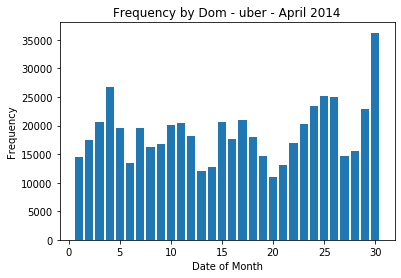

In [28]:
hist(data.dom, bins=30, rwidth=0.8, range =(0.5,30.5))
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency by Dom - uber - April 2014')

In [34]:
for k, rows in data.groupby('dom'):
    print((k, len(rows)))


(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [36]:
def count_row(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_row)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

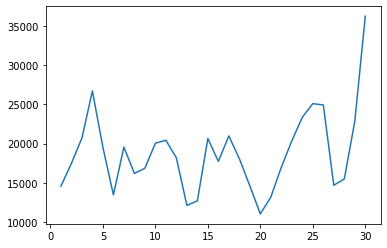

In [39]:
plot(by_date);

In [38]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

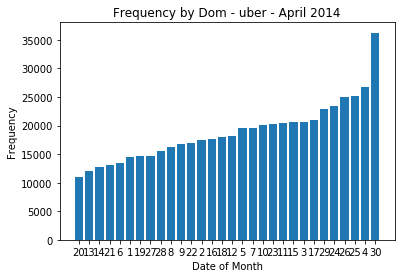

In [44]:
bar(range(1, 31),by_date_sorted)
xticks(range(1, 31),by_date_sorted.index)
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency by Dom - uber - April 2014')
;

# analysis hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

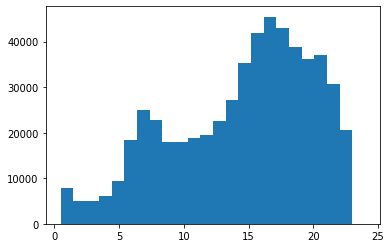

In [50]:
hist(data.hour, bins=24, range=[0.5,24]) 

## Analyse Weekday

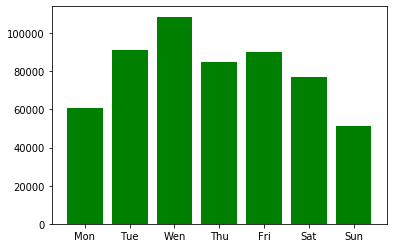

In [58]:
hist(data.weekday, bins=7, range=(-0.5,6.5), rwidth=.8, color='green') 
xticks(range(7),'Mon Tue Wen Thu Fri Sat Sun'.split());

# Cross Analysis (hour, Day of Week)

In [61]:
count_row(data)

564516

In [67]:
data.groupby('weekday hour'.split()).apply(count_row).unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


In [69]:
by_cross = data.groupby('weekday hour'.split()).apply(count_row).unstack()

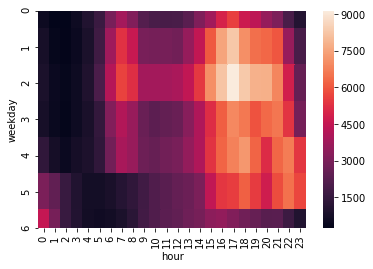

In [70]:
seaborn.heatmap(by_cross)

# by lat and lon

''

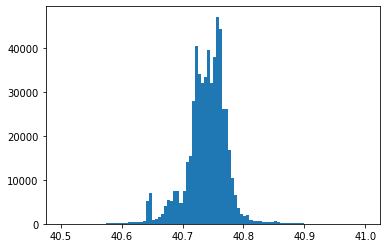

In [75]:
hist(data['Lat'], bins=100, range= (40.5, 41))
;


''

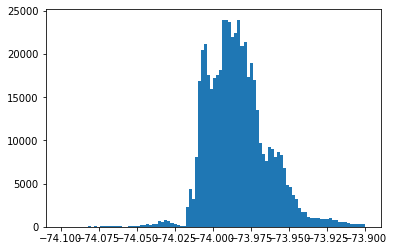

In [80]:
hist(data['Lon'], bins=100, range = (-74.1,-73.9))
;


''

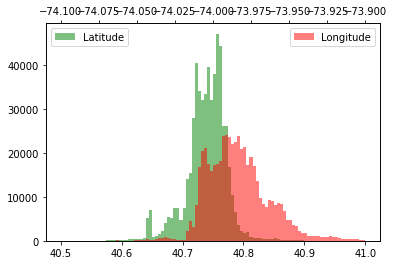

In [90]:
hist(data['Lat'], bins=100, range= (40.5, 41),color='g',alpha=0.5, label ='Latitude')

legend(loc='upper left')
twiny()
hist(data['Lon'], bins=100, range = (-74.1,-73.9),color='r', alpha=.5, label='Longitude')
legend(loc='best')

;

(0, 100)

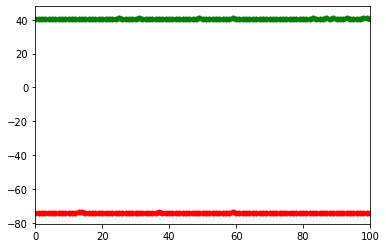

In [95]:
plot(data['Lat'],'.',ms=10, color='green', label='Latitude')
plot(data['Lon'],'.',ms=10, color='red', label='long')
xlim(0,100)

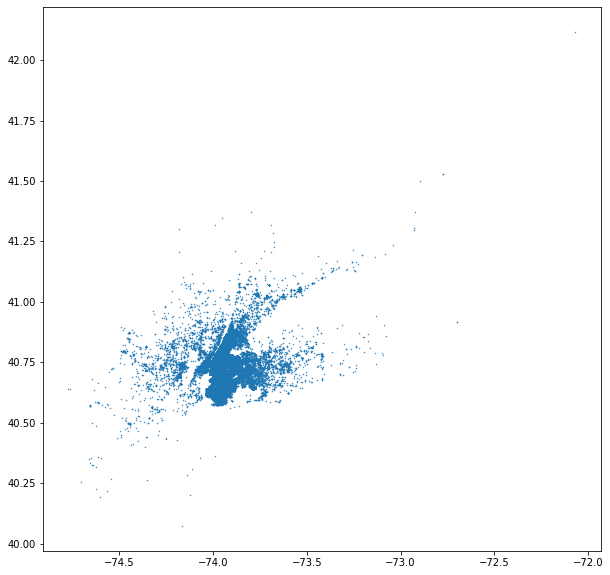

In [106]:
figure(figsize(10,10))
plot(data['Lon'], data['Lat'],'.', ms=1,alpha=.9)
xlim=(-74.2, -73.7)
ylim=(40.7,41)